In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

from cleaner import clean_dataframe, partially_clean_dataframe

In [131]:
color_blue = "#1a559e"
color_blue_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"

In [132]:
# Set seed for reproducibility
np.random.seed(42)

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=1, random_state=42)

# Add outliers
outliers = np.random.uniform(low=-5, high=5, size=(20, 2))
X = np.vstack([X, outliers])

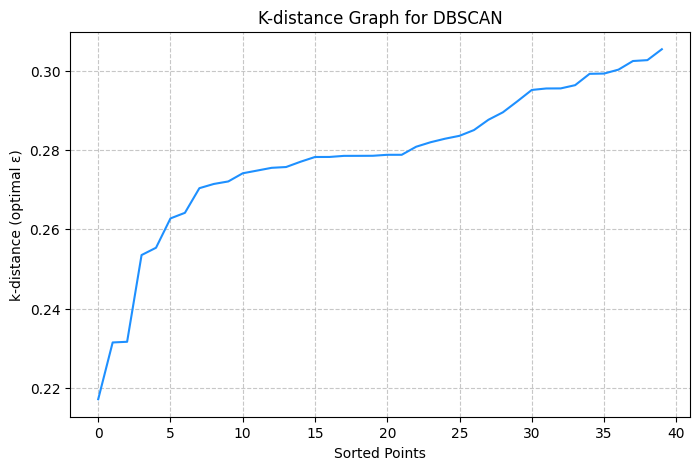

In [133]:
# initial min_samples (e.g. 5)
min_samples = 15

# Set seed
np.random.seed(42)

# Calculate distances
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances (take only the last column, k-th neighbor)
distances = np.sort(distances[:, min_samples - 1], axis=0)

# K-distance plot
plt.figure(figsize=(8, 5))
plt.plot(distances[:40], color=color_blue_light)
plt.xlabel('Sorted Points')
plt.ylabel('k-distance (optimal ε)')
plt.title('K-distance Graph for DBSCAN')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [134]:
# Trova il valore di eps per i numeri 10 e 12
eps_10 = distances[10]
eps_12 = distances[12]

print(f"Valore di eps per 10: {eps_10}")
print(f"Valore di eps per 12: {eps_12}")

Valore di eps per 10: 0.27411981765783566
Valore di eps per 12: 0.27549870689569317


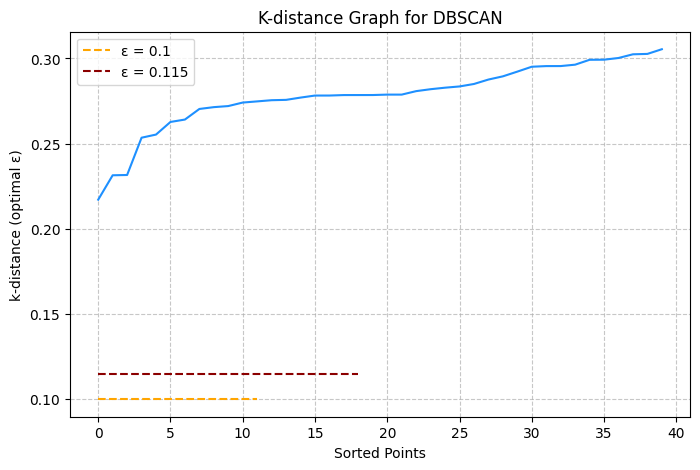

In [135]:
eps_exp_1 = 0.1
eps_exp_2 = 0.115

# K-distance plot
plt.figure(figsize=(8, 5))
plt.plot(distances[:40], color=color_blue_light)
plt.hlines(y=eps_exp_1, xmin=0, xmax=11, color=color_orange, linestyle='--', label=f'ε = {eps_exp_1}')
plt.hlines(y=eps_exp_2, xmin=0, xmax=18, color=color_red, linestyle='--', label=f'ε = {eps_exp_2}')
plt.xlabel('Sorted Points')
plt.ylabel('k-distance (optimal ε)')
plt.title('K-distance Graph for DBSCAN')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [136]:
# Apply DBSCAN with different parameters
eps_1 = eps_exp_1
eps_2 = eps_exp_2

In [137]:
from sklearn.metrics import silhouette_score

# Valori trovati dalla K-distance graph
eps_ottimale = eps_2

# Test diversi valori di min_samples
for min_samples in range(5,40):
    dbscan = DBSCAN(eps=eps_ottimale, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    
    # Controlla se esistono almeno due cluster per calcolare silhouette
    if len(set(labels)) > 1 and -1 not in set(labels):
        silhouette = silhouette_score(X, labels)
        print(f"min_samples={min_samples}, silhouette={silhouette:.3f}")
    else:
        print(f"min_samples={min_samples}, non valida per silhouette (troppi rumori o un solo cluster)")


min_samples=5, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=6, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=7, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=8, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=9, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=10, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=11, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=12, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=13, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=14, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=15, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=16, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=17, non valida per silhouette (troppi rumori o un solo cluster)
min_samples=18, n

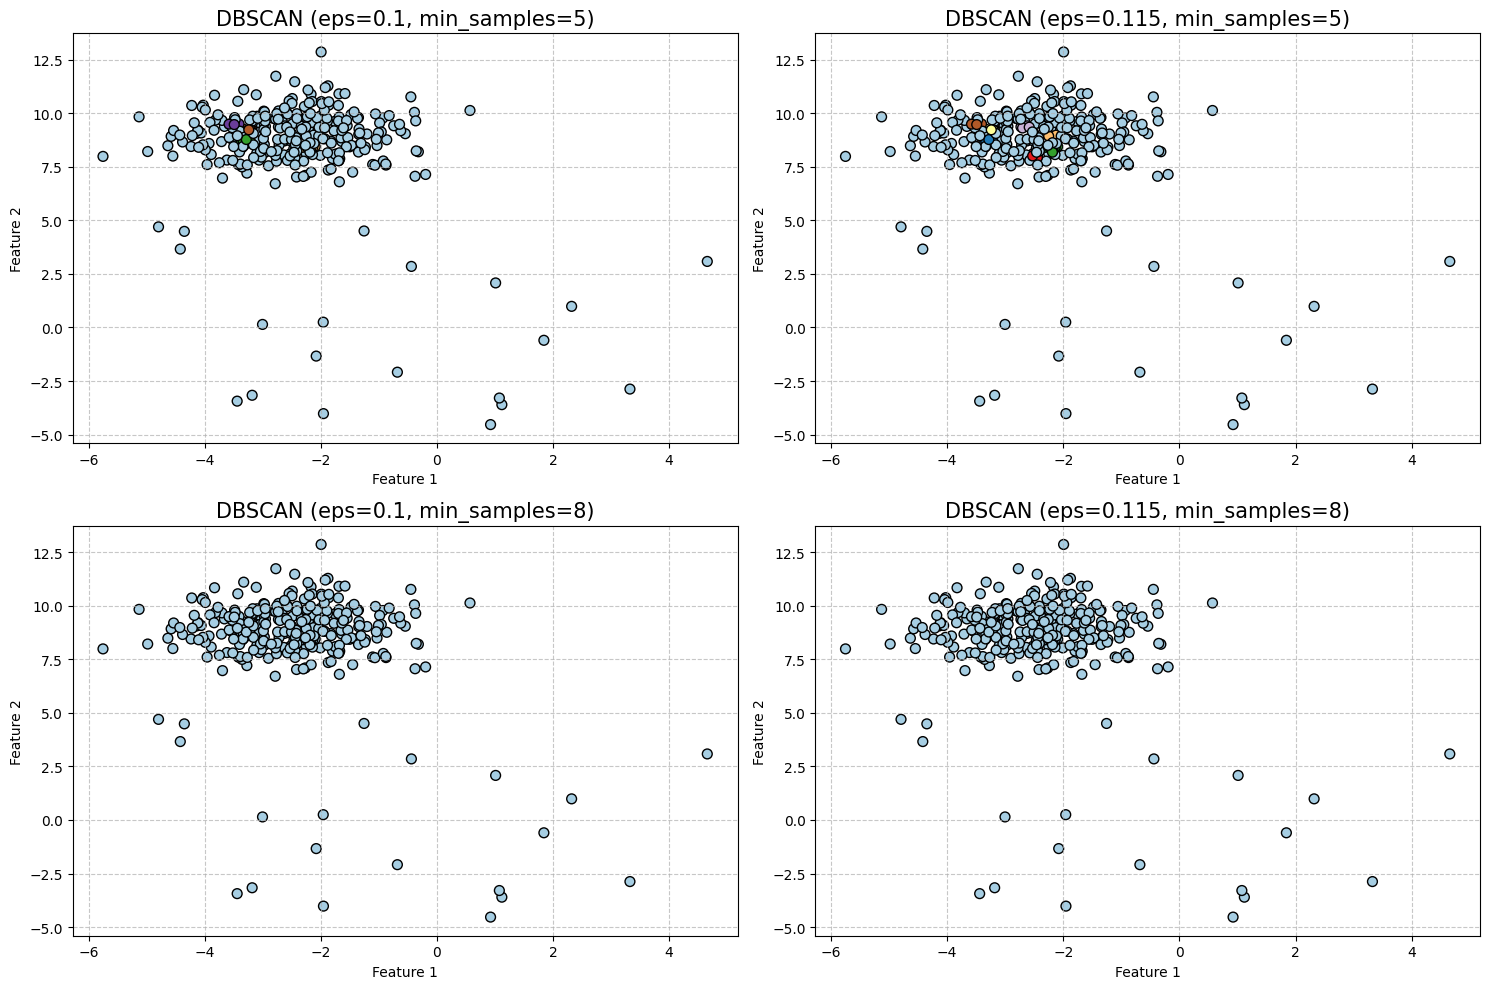

In [138]:
min_samples_1 = 5
min_samples_2 = 8

params = [
    {'eps': eps_1, 'min_samples': min_samples_1},
    {'eps': eps_2, 'min_samples': min_samples_1},
    {'eps': eps_1, 'min_samples': min_samples_2},
    {'eps': eps_2, 'min_samples': min_samples_2}
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterate over the parameters and axes
for ax, param in zip(axes.flatten(), params):
    # Apply DBSCAN with the current parameters
    dbscan = DBSCAN(eps=param['eps'], min_samples=param['min_samples'])
    clusters = dbscan.fit_predict(X)
    
    # Plot the results
    ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap='Paired', s=50, edgecolors='k')
    ax.set_title(f"DBSCAN (eps={param['eps']}, min_samples={param['min_samples']})", fontsize=15)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


# Distributions

In [139]:
# Import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/Bankrupt.csv')
df = partially_clean_dataframe(df)


In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


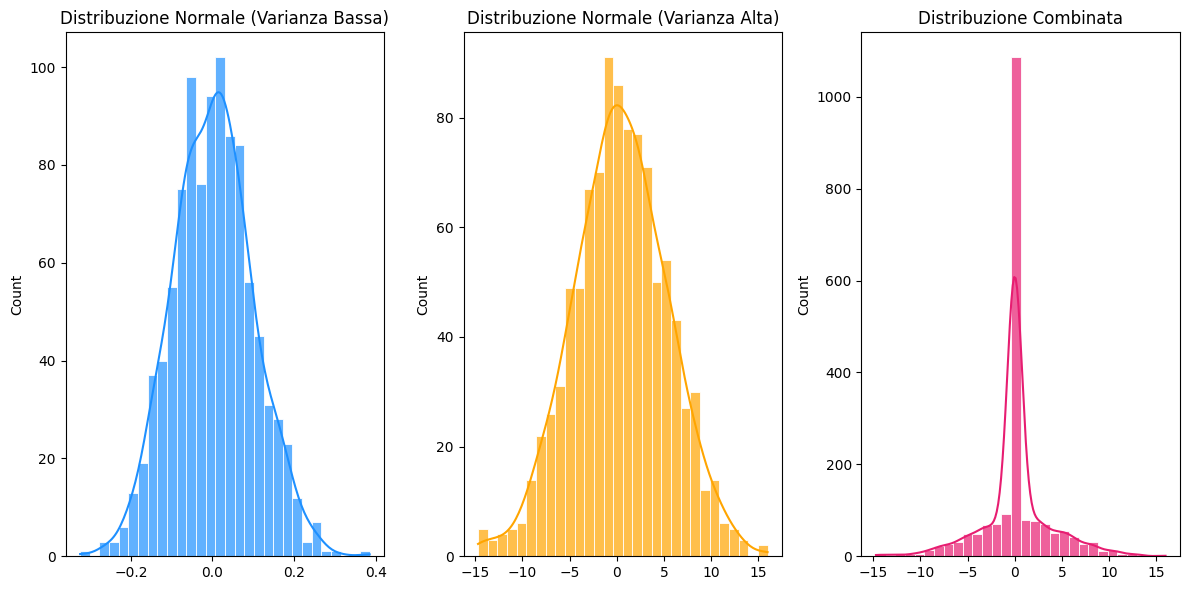

In [141]:
# Creazione della distribuzione normale con varianza bassa
mu1, sigma1 = 0, 0.1  # media e deviazione standard bassa
normal_dist_low_var = np.random.normal(mu1, sigma1, 1000)

# Creazione della distribuzione normale con varianza alta
mu2, sigma2 = 0, 5  # media e deviazione standard alta
normal_dist_high_var = np.random.normal(mu2, sigma2, 1000)

# Unione dei risultati
combined_normal_dist = np.concatenate((normal_dist_low_var, normal_dist_high_var))

# Visualizzazione delle distribuzioni
plt.figure(figsize=(12, 6))

# Istogramma della distribuzione normale con varianza bassa
plt.subplot(1, 3, 1)
sns.histplot(normal_dist_low_var, bins=30, kde=True, color=color_blue_light, edgecolor="white", alpha=0.7)
plt.title('Distribuzione Normale (Varianza Bassa)')

# Istogramma della distribuzione normale con varianza alta
plt.subplot(1, 3, 2)
sns.histplot(normal_dist_high_var, bins=30, kde=True, color=color_orange, edgecolor="white", alpha=0.7)
plt.title('Distribuzione Normale (Varianza Alta)')

# Istogramma della distribuzione combinata
plt.subplot(1, 3, 3)
sns.histplot(combined_normal_dist, bins=30, kde=True, color=color_pink, edgecolor="white", alpha=0.7)
plt.title('Distribuzione Combinata')

plt.tight_layout()
plt.show()

In [142]:
# # Select the column to analyze
# col_to_analyze = "Total Asset Turnover"

# # Extract the data for the selected column
# data = df[col_to_analyze]



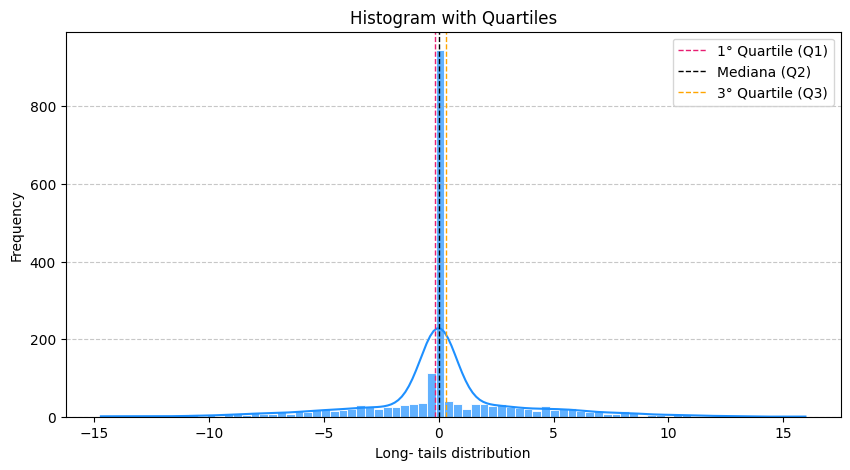

In [143]:
# Calculate the quartiles for the data
q1, q2, q3 = np.percentile(combined_normal_dist, [25, 50, 75])

# Set the number of bins for the histogram
bins = 80

# Create the histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(combined_normal_dist, bins=bins, kde=True, color=color_blue_light, edgecolor="white", alpha=0.7)

# Add lines for the quartiles
plt.axvline(q1, color=color_pink, linestyle="dashed", linewidth=1, label="1° Quartile (Q1)")
plt.axvline(q2, color=color_black, linestyle="dashed", linewidth=1, label="Mediana (Q2)")
plt.axvline(q3, color=color_orange, linestyle="dashed", linewidth=1, label="3° Quartile (Q3)")

# Add labels and title
plt.xlabel("Long- tails distribution")
plt.ylabel("Frequency")
plt.title("Histogram with Quartiles")
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [144]:
# Parameters for the gamma distribution
shape, scale = 2., 2.  # mean=shape*scale, var=shape*scale**2

# Generate the gamma distribution
asymmetric_dist = np.random.gamma(shape, scale, 1000)


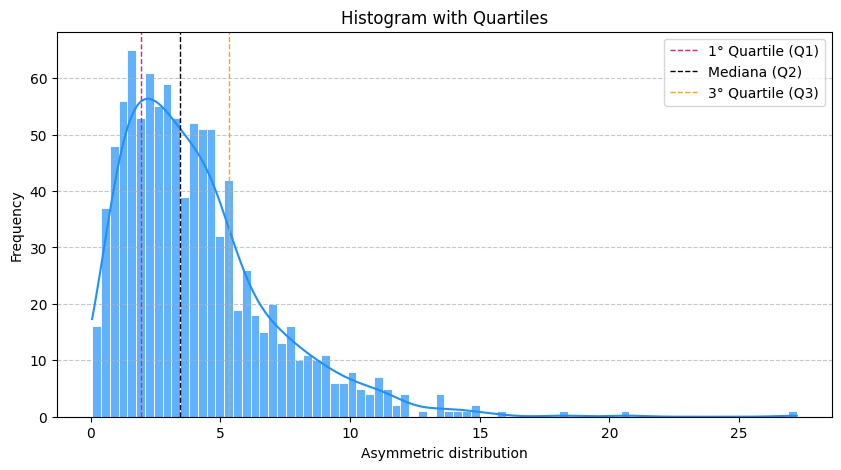

In [145]:
# Calculate the quartiles for the data
q1, q2, q3 = np.percentile(asymmetric_dist, [25, 50, 75])

# Set the number of bins for the histogram
bins = 80
plt.figure(figsize=(10, 5))
sns.histplot(asymmetric_dist, bins=bins, kde=True, color=color_blue_light, edgecolor="white", alpha=0.7)

# Add lines for the quartiles
plt.axvline(q1, color=color_pink, linestyle="dashed", linewidth=1, label="1° Quartile (Q1)")
plt.axvline(q2, color=color_black, linestyle="dashed", linewidth=1, label="Mediana (Q2)")
plt.axvline(q3, color=color_orange, linestyle="dashed", linewidth=1, label="3° Quartile (Q3)")

# Add labels and title
plt.xlabel("Asymmetric distribution")
plt.ylabel("Frequency")
plt.title("Histogram with Quartiles")
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

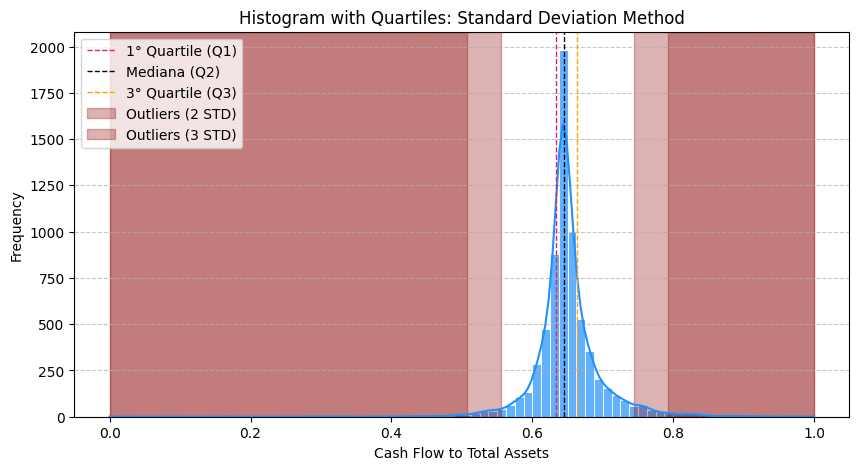

In [146]:
# Import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/Bankrupt.csv')
df = clean_dataframe(df)

# Select the column to analyze
col_to_analyze = "Cash Flow to Total Assets"
data = df[col_to_analyze]

# Calculate the quartiles for the data
q1, q2, q3 = np.percentile(data, [25, 50, 75])

# Set the number of bins for the histogram
bins = 80

# Calculate the mean and standard deviation of the data
mean = data.mean()
std = data.std()

# Define the threshold for identifying outliers (number of standard deviations from the mean)
threshold = 2

# Compute the thresholds for outlier detection
computed_threshold = threshold * std
computed_threshold_right = mean + computed_threshold 
computed_threshold_left = mean - computed_threshold

# Identify outliers based on the standard deviation method
standard_deviation_outliers = np.abs(data - mean) > computed_threshold

# Threshold for the number of standard deviations from the mean
threshold = 3

# Compute the thresholds for outlier detection
computed_threshold_3std = threshold * std
computed_threshold_right_3std = mean + computed_threshold_3std 
computed_threshold_left_3std = mean - computed_threshold_3std

# Identify outliers based on the standard deviation method
standard_deviation_outliers_3std = np.abs(data - mean) > computed_threshold

# Create the histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=bins, kde=True, color=color_blue_light, edgecolor="white", alpha=0.7)

# Add lines for the quartiles
plt.axvline(q1, color=color_pink, linestyle="dashed", linewidth=1, label="1° Quartile (Q1)")
plt.axvline(q2, color=color_black, linestyle="dashed", linewidth=1, label="Mediana (Q2)")
plt.axvline(q3, color=color_orange, linestyle="dashed", linewidth=1, label="3° Quartile (Q3)")

# Color the area beyond the computed thresholds
outliers_label = f"Outliers (2 STD)"
plt.axvspan(computed_threshold_right, data.max(), color=color_red, alpha=0.3, label=outliers_label)
plt.axvspan(data.min(), computed_threshold_left, color=color_red, alpha=0.3)


# Color the area beyond the computed thresholds
outliers_label = f"Outliers (3 STD)"
plt.axvspan(computed_threshold_right_3std, data.max(), color=color_red, alpha=0.3, label=outliers_label)
plt.axvspan(data.min(), computed_threshold_left_3std, color=color_red, alpha=0.3)

# Add labels and title
plt.xlabel(col_to_analyze)
plt.ylabel("Frequency")
plt.title("Histogram with Quartiles: Standard Deviation Method")
plt.legend(loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


# DBSCAN

In [182]:
for i in df.columns:
    print(i)

Net Value Per Share (A)
Current Assets/Total Assets
Fixed Assets to Assets
Cash/Total Assets
Debt ratio %
Total debt/Total net worth
Quick Assets/Current Liability
Interest-bearing debt interest rate
Operating Profit Rate
Cash Flow to Total Assets
Net Income to Stockholder's Equity
Operating Profit Growth Rate
Total Asset Turnover
Inventory Turnover Rate (times)
Accounts Receivable Turnover
Current Ratio
Cash Flow to Sales
Current Asset Turnover Rate
Continuous Net Profit Growth Rate
Cash Turnover Rate
Bankrupt?


In [218]:
col1 = 'Net Value Per Share (A)'
col2 = 'Total Asset Turnover'
data = df[[col1, col2]]
data.describe()


,Net Value Per Share (A),Total Asset Turnover
count,6819.000000,6819.000000
mean,0.190633,0.141606
std,0.033474,0.101145
min,0.000000,0.000000
25%,0.173613,0.076462
50%,0.184400,0.118441
75%,0.199570,0.176912
max,1.000000,1.000000


In [219]:
# Filter over 4 std from the mean for both columns
data = data[(np.abs(data[col1] - data[col1].mean()) < 4 * data[col1].std()) & 
                      (np.abs(data[col2] - data[col2].mean()) < 4 * data[col2].std())]


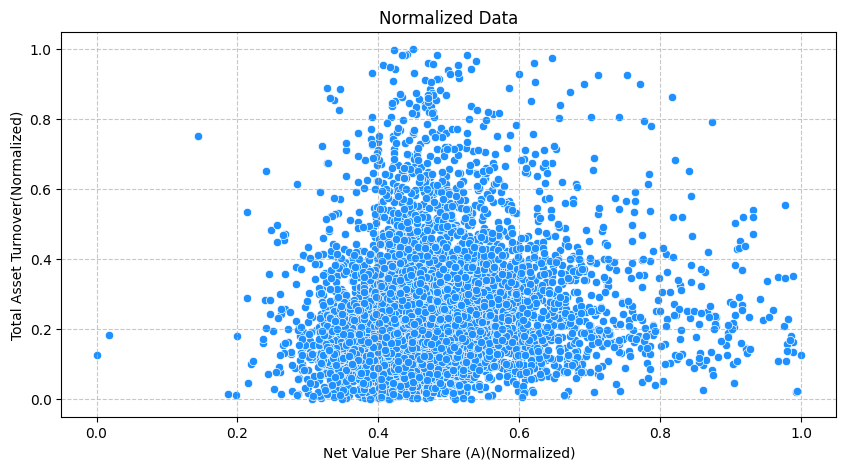

In [220]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Convert the normalized data to a DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

# Plot the normalized data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data_normalized, x=col1, y=col2, color=color_blue_light)
plt.title('Normalized Data')
plt.xlabel(col1 + "(Normalized)")
plt.ylabel(col2 + "(Normalized)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [221]:
print(param['eps'])
print(param['min_samples'])

0.0275
5


In [230]:
# Apply DBSCAN to find outliers
dbscan = DBSCAN(eps=param['eps'], min_samples=param['min_samples'])
labels = dbscan.fit_predict(data)

# Identify outliers (label -1 indicates outliers)
outliers = data[labels == -1]

print(f"Number of outliers detected: {len(outliers)}")
print(outliers)

Number of outliers detected: 0
Empty DataFrame
Columns: [Net Value Per Share (A), Total Asset Turnover]
Index: []


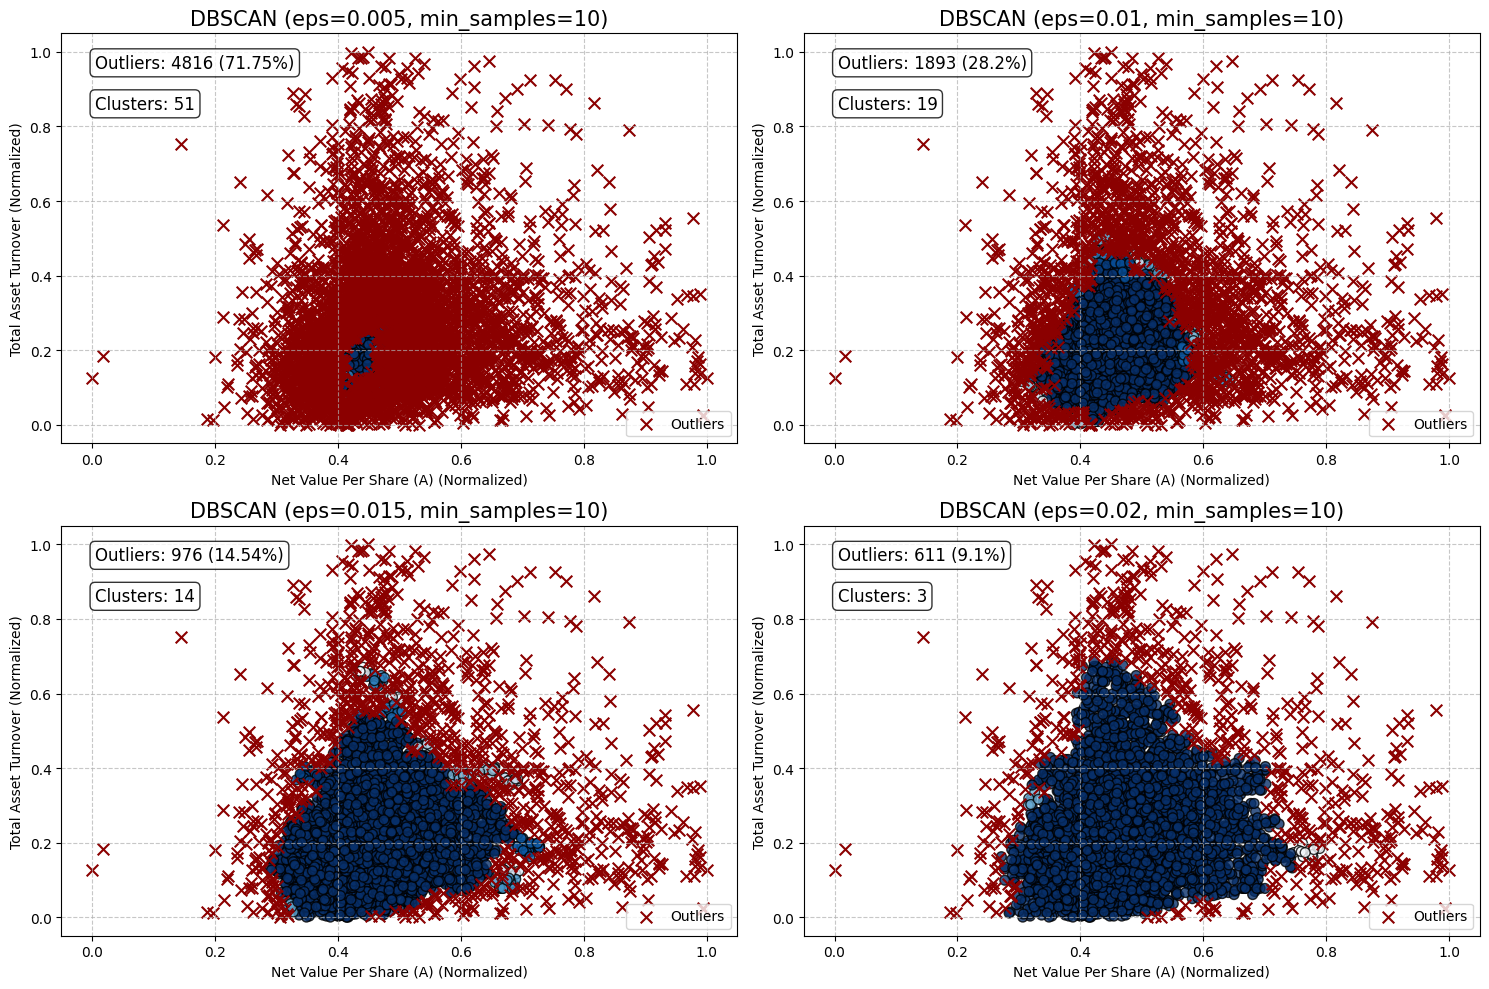

In [250]:
eps_1 = 0.005
eps_2 = 0.01
eps_3 = 0.015
eps_4 = 0.02

min_samples_1 = 10
min_samples_2 = 3

params = [
    {'eps': eps_1, 'min_samples': min_samples_1},
    {'eps': eps_2, 'min_samples': min_samples_1},
    {'eps': eps_3, 'min_samples': min_samples_1},
    {'eps': eps_4, 'min_samples': min_samples_1}
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

len_data = len(data)

# Iterate over the parameters and axes
for ax, param in zip(axes.flatten(), params):
    # Apply DBSCAN with the current parameters
    dbscan = DBSCAN(eps=param['eps'], min_samples=param['min_samples'])
    clusters = dbscan.fit_predict(data_normalized)
    
    # Count unique clusters (excluding noise points with label -1)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    
    # Identify outliers (noise points)
    outliers_mask = clusters == -1
    inliers_mask = ~outliers_mask
    
    # Count outliers
    num_outliers = np.sum(outliers_mask)
    perc_outliers = round(num_outliers / len_data * 100, 2)
    
    # Plot inliers with cluster-based coloring
    scatter = ax.scatter(
        data_normalized.iloc[inliers_mask, 0], 
        data_normalized.iloc[inliers_mask, 1], 
        c=clusters[inliers_mask], 
        cmap='Blues_r', 
        s=50, 
        alpha=0.8,
        edgecolors='k'
    )
    
    # Plot outliers as distinct red points
    ax.scatter(
        data_normalized.iloc[outliers_mask, 0], 
        data_normalized.iloc[outliers_mask, 1], 
        c=color_red, 
        marker='x', 
        s=70, 
        label='Outliers'
    )
    
    # Add status information about outliers and clusters
    ax.text(0.05, 0.95, f'Outliers: {num_outliers} ({perc_outliers}%)', 
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.text(0.05, 0.85, f'Clusters: {n_clusters}', 
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Set title and labels
    ax.set_title(f"DBSCAN (eps={param['eps']}, min_samples={param['min_samples']})", fontsize=15)
    ax.set_xlabel(col1 + " (Normalized)")
    ax.set_ylabel(col2 + " (Normalized)")
    ax.grid(True, linestyle="--", alpha=0.7)
    
    # Add legend if there are outliers
    if num_outliers > 0:
        ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

c:\Users\vinor\Desktop\Develhope\projects\EDU-DataSelection\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


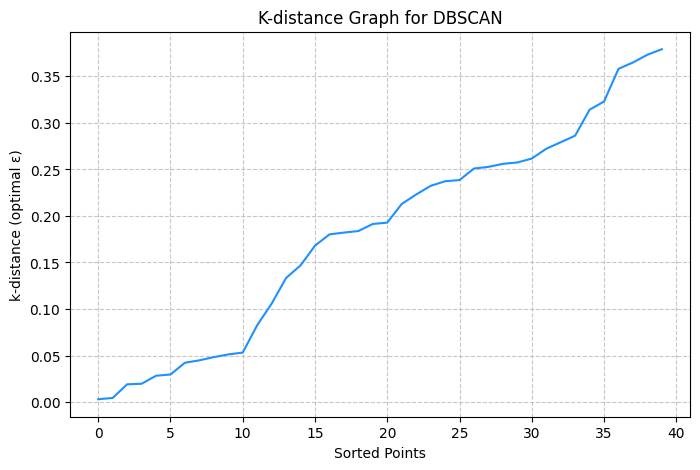

In [224]:
# initial min_samples (e.g. 5)
min_samples = 5

# Set seed
np.random.seed(42)

# Calculate distances
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances (take only the last column, k-th neighbor)
distances = np.sort(distances[:, min_samples - 1], axis=0)

# K-distance plot
plt.figure(figsize=(8, 5))
plt.plot(distances[:40], color=color_blue_light)
plt.xlabel('Sorted Points')
plt.ylabel('k-distance (optimal ε)')
plt.title('K-distance Graph for DBSCAN')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# ISOLATION FOREST

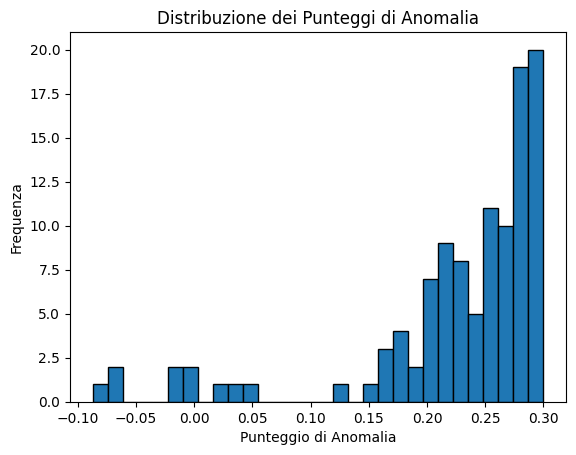

In [225]:
from sklearn.ensemble import IsolationForest

# Inizializziamo il modello con contamination fissato
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

# Predizione: -1 = anomalia, 1 = normale
y_pred = model.predict(X)

model_auto = IsolationForest(contamination="auto", random_state=42)
model_auto.fit(X)

# Predizione
y_pred_auto = model_auto.predict(X)


import numpy as np

# Calcoliamo i punteggi di anomalia (valori negativi indicano outlier)
scores = model.decision_function(X)

# Visualizziamo la distribuzione dei punteggi
import matplotlib.pyplot as plt
plt.hist(scores, bins=30, edgecolor='black')
plt.xlabel("Punteggio di Anomalia")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei Punteggi di Anomalia")
plt.show()

# Scegliamo una soglia basata su percentili
threshold = np.percentile(scores, 5)  # Soglia basata sul 5° percentile
anomalies = X[scores < threshold]


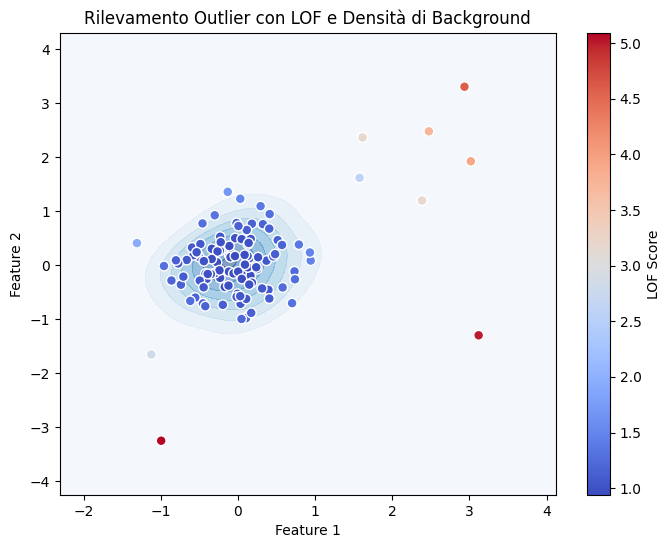

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import gaussian_kde

# Generazione di dati con alcuni outlier
np.random.seed(42)
X_inlier = 0.5 * np.random.randn(100, 2)
X_outlier = np.random.uniform(low=-4, high=4, size=(10, 2))
X = np.vstack((X_inlier, X_outlier))

# Applicazione del Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)
lof_scores = -lof.negative_outlier_factor_

# Calcolo della densità dei punti per lo sfondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
xy_sample = np.vstack([xx.ravel(), yy.ravel()]).T

# Stima della densità con Kernel Density Estimation (KDE)
kde = gaussian_kde(X.T)
density = kde(np.vstack([xx.ravel(), yy.ravel()]))
density = density.reshape(xx.shape)

# Creazione del grafico
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, density, cmap="Blues", alpha=0.5)  # Sfondo con densità
plt.scatter(X[:, 0], X[:, 1], c=lof_scores, cmap="coolwarm", edgecolors="white", s=50)
plt.colorbar(label="LOF Score")
plt.title("Rilevamento Outlier con LOF e Densità di Background")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor

param_grid = {'n_neighbors': [5, 10, 20, 30, 50]}
lof = LocalOutlierFactor(contamination=0.1)
grid_search = GridSearchCV(lof, param_grid, cv=5)
grid_search.fit(X)
print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])


TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator LocalOutlierFactor(contamination=0.1) does not.